# Homework 3 (solutions)

### Problem 1

Use read_html() function from the pandas library inside a for loop to get and print exchange rate data from rate.am for a week starting on June 1st and ending on 7th of June, 2017 included. The necessary steps to take are: 1) create the list of URLs to scrape, 2) create a for loop to iterate over the elements of that list and 3) receive the data from each of them and 4) print it. (Hint: you may try for 2 URLs first, and then go for 7).

In [1]:
import pandas as pd
urls = ["http://rate.am/am/armenian-dram-exchange-rates/banks/non-cash/2017/06/01/20-15",
        "http://rate.am/am/armenian-dram-exchange-rates/banks/non-cash/2017/06/02/20-15",
        "http://rate.am/am/armenian-dram-exchange-rates/banks/non-cash/2017/06/03/20-15",
        "http://rate.am/am/armenian-dram-exchange-rates/banks/non-cash/2017/06/04/20-15",
        "http://rate.am/am/armenian-dram-exchange-rates/banks/non-cash/2017/06/05/20-15",
        "http://rate.am/am/armenian-dram-exchange-rates/banks/non-cash/2017/06/06/20-15",
        "http://rate.am/am/armenian-dram-exchange-rates/banks/non-cash/2017/06/07/20-15"]

for url in urls:
    data = pd.read_html(url)
    print(data[2][2:19])

     0                       1    2   3              4       5       6   \
2    1.               Արցախբանկ  NaN  24  01 Հնս, 20:00     481  484.50   
3    2.       ՎՏԲ-Հայաստան Բանկ  NaN  68  01 Հնս, 20:00  480.75  483.25   
4    3.             Մելլաթ բանկ  NaN   1  01 Հնս, 20:00     480     484   
5    4.               Ինեկոբանկ  NaN  23  01 Հնս, 20:00  480.50  483.75   
6    5.       Էյչ-Էս-Բի-Սի Բանկ  NaN   9  01 Հնս, 20:00  480.50  484.50   
7    6.            Կոնվերս բանկ  NaN  35  01 Հնս, 20:00     480  483.50   
8    7.       ՀԱՅԲԻԶՆԵՍԲԱՆԿ ՓԲԸ  NaN  53  01 Հնս, 20:00     480  483.50   
9    8.  ԱԿԲԱ-ԿՐԵԴԻՏ ԱԳՐԻԿՈԼ ..  NaN  59  01 Հնս, 20:00  480.25  483.75   
10   9.              Ամերիաբանկ  NaN  11  01 Հնս, 20:00  479.50  483.50   
11  10.           ՀԱՅԷԿՈՆՈՄԲԱՆԿ  NaN  49  01 Հնս, 20:00     480  483.50   
12  11.              Արդշինբանկ  NaN  53  01 Հնս, 20:00  480.50  483.50   
13  12.             Անելիք Բանկ  NaN  14  01 Հնս, 20:00     480  483.50   
14  13.     Բիբլոս Բանկ Ա

A note: instead of typing the 7 URLS above, one could just take the very first URL and then generate the others based on the first one, as the day digit is the only difference between URLs.

### Problem 2

Use regular expressions to match (find) and print the value of S&P500 index from the Bloomberg website ([click here](https://www.bloomberg.com/quote/SPX:IND), at the time of writing this the value of the index is 2,434.51). Your regular expression must match any value of S&P500 even if it changes (e.g. whether it becomes 1 or even 1,500,000.005, for example).

In [2]:
import re
import requests

url = "https://www.bloomberg.com/quote/SPX:IND"
response = requests.get(url)
data = response.text

output = re.findall('class\s*=\s*"price"\s*>\s*(\S+)</',data)
print(output)

[u'2,440.35']


### Problem 3

Create a for loop that will iterate over a given JSON file and print the keys followed by their values. The file (input string, which yet needs to be converted to JSON, as done in the classroom) and the expected output can be found in [this Jupyter notebook](http://nbviewer.jupyter.org/github/HrantDavtyan/Data_Scraping/blob/master/Week 3/HW3_P3_source.ipynb). NOTE: not more than one "if" and one "else" statements are allowed to use inside the for loop.

In [3]:
import json

input = '''[
    {
    "Movie":"Game of Thrones",
    "Actor":"Peter Dinklage",
    "Role":"Tyrion Lannister"    
    },
    {
    "Movie":"Vikings",
    "Actor":"Travis Fimmel",
    "Role":"Ragnar Lothbrok"  
    },
    {
    "Movie":"The last Kingdom",
    "Actor":{
            "Young Uhtred":"Tom Taylor",
            "Not that young Uhtred":"Alexander Dreymon"
            },
    "Role":"Uhtred of Bebbanburg"
    }
]'''

data = json.loads(input)
for i in data:
    if len(i["Actor"])==2:
        print "Movie: ",i["Movie"]
        print "Role: ", i["Role"]
        print "Actor 1: ",i["Actor"]["Young Uhtred"]
        print "Actor 2: ",i["Actor"]["Not that young Uhtred"],"\n"
    else:
        print "Movie: ",i["Movie"]
        print "Role: ", i["Role"]
        print "Actor:",i["Actor"],"\n"

Movie:  Game of Thrones
Role:  Tyrion Lannister
Actor: Peter Dinklage 

Movie:  Vikings
Role:  Ragnar Lothbrok
Actor: Travis Fimmel 

Movie:  The last Kingdom
Role:  Uhtred of Bebbanburg
Actor 1:  Tom Taylor
Actor 2:  Alexander Dreymon 



### Problem 4

Download the AirPassengers.csv file from the Datasets folder in the Moodle, read that file to python and plot the "Passengers" column.

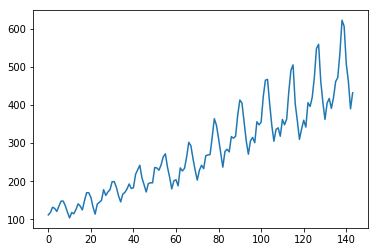

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("AirPassengers.csv")
plt.plot(data["Passengers"])
plt.show()

### Problem 5

Use regular expressions to find the URL (the hyperlink) under the Next button on [this webpage](http://quotes.toscrape.com/).

In [5]:
import re
import requests

url = "http://quotes.toscrape.com/"
response = requests.get(url)
data = response.text

output = re.findall('<a\s+href\s*=\s*"\s*(\S+)\s*"\s*\S*\s*>\s*Next',data)
print(output)

[u'/page/2/']
